### Contrast Limited Adaptive Histogram Equalization (CLAHE)
In this tutorial, we are going to see how to apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to equalize images. CLAHE is a variant of Adaptive histogram equalization (AHE) which takes care of over-amplification of the contrast. CLAHE operates on small regions in the image, called tiles, rather than the entire image. The neighboring tiles are then combined using bilinear interpolation to remove the artificial boundaries. This algorithm can be applied to improve the contrast of images.
We can also apply CLAHE to color images, where usually it is applied on the luminance channel and the results after equalizing only the luminance channel of an HSV image are much better than equalizing all the channels of the BGR image.

### Adaptive Histogram Equalization (AHE)
Histogram equalization is a method in image processing of contrast adjustment using the image’s histogram.
This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values. The method is useful in images with backgrounds and foregrounds that are both bright or both dark. 

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

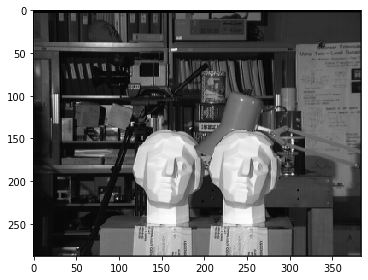

In [11]:
img = cv.imread('images/clahe_3.png', 0)
imshow(img);

In [3]:
clahe= cv.createCLAHE(clipLimit=2.0,  tileGridSize=(8,8))

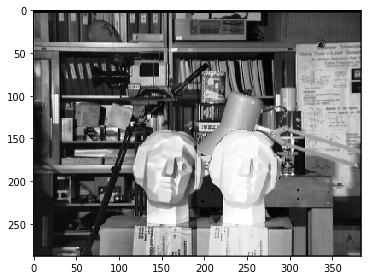

In [12]:
w=img.shape[1]
img[:,:w//2]= clahe.apply(img[:,:w//2])
img[:,w//2:]= cv.equalizeHist(img[:,w//2:])
imshow(img);

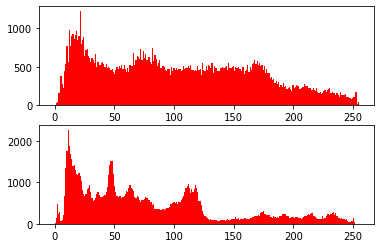

In [13]:
img2= clahe.apply(img_orginal)
ax1= plt.subplot(2,1,1)
ax1.hist(img2.flatten(), 256, [0,255], color='r');

ax2= plt.subplot(2,1,2)
ax2.hist(img_orginal.flatten(), 256, [0,255], color='r');

plt.show()

### What is the difference between AHE and CLAHE?
CLAHE limits the range of the output image so that you don't get big outliers. In essence, it clips values if they get too huge. This is the usual method people use. There is no real harm but good benefits so there's no reason not to do it. I don't ever see straight AHE being used. CLAHE is performed by adapthisteq() in the Image Processing Toolbox.
There is also a histogram equalization function histeq() but it's worthless because it uses the histogram of the whole image. Anyone who's ever used histogram equalization can tell you that global histeq is no good. Histogram equalization is only good if you do it locally like CLAHE does.